<div align ="right">Thomas Jefferson University <b>COMP 104</b>: Intro to Big Data</div>

# Distributions

We will complete the exercises that accompany sections 6.1-6.3 and found on page 119 in the textbook. For each exercise the correct answers are given in the text, write python code to calculate each answer and use the given data to confirm. 

### 6.1 Sample Standard Deviation
Create an numpy-array, containing the data 1, 2, 3, ..., 10. Calculate mean and
sample(!)-standard deviation. (Correct answer for the SD: 3.03.)

In [58]:
import numpy as np
from scipy import stats
data = np.r_[1,2,3,4,5,6,7,8,9,10]
print(data)

#FIRST ATTEMPT
#x = sum (data)
#print ("total =",x)
#mean = (x/10)
#print ("mean = ",mean)

n=len(data)
mean = sum(data)/n
ddof = 1
sd= sum((x-mean)**2 for x in data)/(n-ddof)
print("Mean =",mean)
print ("Standard Deviation =", sd)

##Text##
x = np.arange (1,11)
print('The real standard deviation of the numbers from 1 to 10 is {0:4.2f}'.format(np.std(x, ddof=1)))




[ 1  2  3  4  5  6  7  8  9 10]
Mean = 5.5
Standard Deviation = 9.166666666666666
The real standard deviation of the numbers from 1 to 10 is 3.03


### 6.2 Normal Distribution
* Generate and plot the Probability Density Function (PDF) of a normal distribution,
with a mean of 5 and a standard deviation of 3.
* Generate 1000 random data from this distribution.
* Calculate the standard error of the mean of these data. (Correct answer: ca.
0.096.)
* Plot the histogram of these data.
* From the PDF, calculate the interval containing 95% of these data. (Correct
answer: [ -0.88, 10.88].)
* Your doctor tells you that he can use hip implants for surgery even if they are
1mm bigger or smaller than the specified size. And your financial officer tells
you that you can discard 1 out of 1000 hip implants, and still make a profit.
What is the required standard deviation for the producer of the hip implants,
to simultaneously satisfy both requirements? (Correct answer: sigma = 0:304 mm.)

The standarad error = 0.0927297750708382


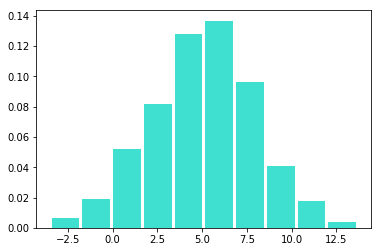

95% Confidence interval: -0.88 - 10.88
The SD to fulfill both requirements = 0.3039 mm


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

nd = stats.norm(5,3)  #for generating a PDF, with a mean of 5 and a sd of 3
data = nd.rvs(1000)   # generation of 1000 random data 

#calculating standard error
se=np.std(data, ddof=1)/np.sqrt(1000)
print ("The standarad error =",se)

#plotting of a histrogram
plt.hist(data,rwidth =0.9, density = True, color = 'turquoise')
plt.show()

#Calc. for interval containing 95% of data
print('95% Confidence interval: {0:4.2f} - {1:4.2f}'.format(
nd.ppf(0.025), nd.ppf(0.975)))

#sd for producer of the hip implants
nd = stats.norm()
numSDs = nd.isf(0.0005)
tolerance = 1/numSDs
print('The SD to fulfill both requirements = {0:6.4f} mm'.format(tolerance))



### 6.3 Continuous Distributions
* t-Distribution: Measuring the weight of your colleagues, you have obtained the following weights: 52, 70, 65, 85, 62, 83, 59 kg. Calculate the corresponding mean, and the 99% confidence interval for the mean. Note: with n values you have n - 1 DOF for the t-distribution. (Correct answer: 68.0 +/- 17.2 kg.)
* Chi-square Distribution: Create three normally distributed data sets (mean = 0, SD = 1), with 1000 samples each. Then square them, sum them (so that you have 1000 data-points), and create a histogram with 100 bins. This should be similar to the curve for the chi-square distribution, with 3 DOF (i.e., it should come down at the left, see Fig. 6.22).
* F-Distribution: You have two apple trees. There are three apples from the first tree that weigh 110, 121, and 143 g, respectively, and four from the other which weigh 88, 93, 105, and 124 g, respectively. Are the variances from the two trees different? Note: calculate the corresponding F-value, and check if the CDF for thecorresponding F-distribution is < 0.025. (Correct answer: no.)

mean +/- 99%CI = 5.5 +/- 3.1


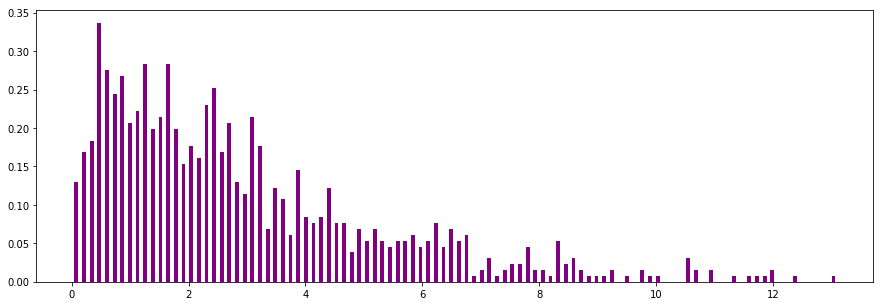

The p-value of the F-distribution = 0.537640478466751.
The variances are equal.


In [82]:
data2 = [52, 70, 65, 85, 62, 83, 59]

td = stats.t(len(x)-1)
alpha = 0.01

tval = abs( td.ppf(alpha/2)*stats.sem(x) )
print('mean +/- 99%CI = {0:3.1f} +/- {1:3.1f}'.format(np.mean
(x),tval))

nd = stats.norm()

numData = 1000
data1 = nd.rvs(numData)
data2 = nd.rvs(numData)
data3 = nd.rvs(numData)

fig = plt.figure(figsize=(15,5))
plt.hist(data1**2+data2**2 +data3**2, 100, rwidth =0.5, density = True, color = 'purple')
plt.show()

apples1 = [110, 121, 143]
apples2 = [88, 93, 105, 124]
fval = np.std(apples1, ddof=1)/np.std(apples2, ddof=1)
fd = stats.distributions.f(len(apples1),len(apples2))
pval = fd.cdf(fval)
print('The p-value of the F-distribution = {0}.'.format(pval))
if pval>0.025 and pval<0.975:
    print('The variances are equal.')

![Alt text that will appear on mouseover](images/TJU_logo_image.png "TJU logo image")